In [23]:
library(tidyverse)
library(cowplot)

In [47]:
set.seed(123)
x1 = rnorm(n = 1000)
x2 = rnorm(n = 1000)
x3 = rnorm(n = 1000)

In [48]:
fun_ranknorm = function(x){
    return(rank(x)/length(x))
}

In [49]:
r1 = fun_ranknorm(x1)
r2 = fun_ranknorm(x2)
r3 = fun_ranknorm(x3)

In [50]:
mat = data.frame(ASSAY1 = r1, ASSAY2 = r2, ASSAY3 = r3)
mat = mat %>% 
    dplyr::mutate(ID = 1:nrow(mat)) %>% 
    rowwise() %>%
    dplyr::mutate(
        Mean = mean(c(ASSAY1, ASSAY2, ASSAY3)),
        STD  = sd(c(ASSAY1, ASSAY2, ASSAY3))
    )
head(mat)

ASSAY1,ASSAY2,ASSAY3,ID,Mean,STD
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
0.277,0.161,0.311,1,0.2496667,0.07864689
0.391,0.148,0.606,2,0.3816667,0.22914260
0.936,0.477,0.293,3,0.5686667,0.33115606
0.523,0.429,0.900,4,0.6173333,0.24926759
0.552,0.005,0.581,5,0.3793333,0.32450629
0.954,0.837,0.266,6,0.6856667,0.36812000


In [51]:
peaks = mat %>% 
    dplyr::arrange(Mean) %>%
    dplyr::pull(ID)

In [52]:
dat = mat
dat = dat %>%
    dplyr::select(ID, ASSAY1, ASSAY2, ASSAY3) %>%
    tidyr::gather(Assay, Value, -ID) %>%
    dplyr::mutate(ID = factor(ID, levels=peaks))

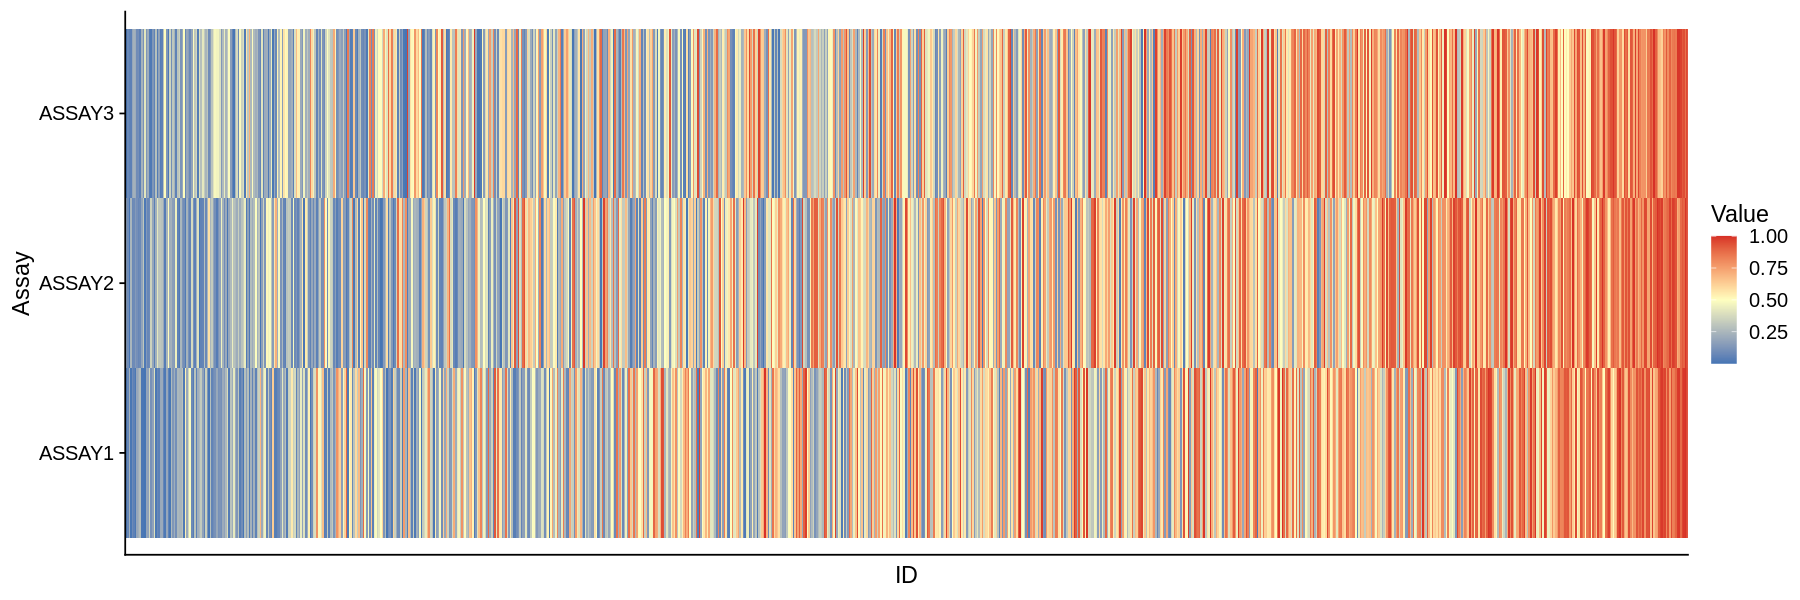

In [53]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank()
)

gpt = ggplot(dat, aes(x=ID, y=Assay, fill=Value)) +
    geom_tile() +
    theme_cowplot() + 
    theme_text +
    theme_fill

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

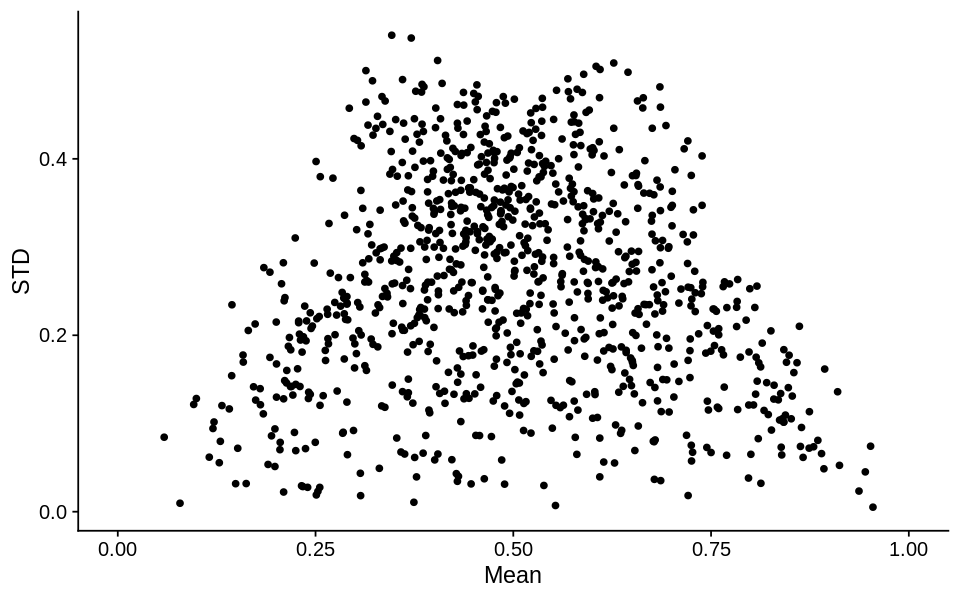

In [55]:
gpt = ggplot(mat, aes(x=Mean, y=STD)) +
    geom_point() +
    theme_cowplot() +
    xlim(c(0, 1))

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)